# Elementary Image Operations

In this module, we will learn the basics of manipulating images using Python.

Upon completion of this module, you will be able to:

- Load an image from your local file system and display it in your development environment
- Modify an image by changing its color and geometric properties
- Save an image to your local file system.

## Loading and displaying an image

Let's load an image. We will use the Python OpenCV library `cv2`.

In [22]:
import numpy as np          # numpy is a package for scientific computing in Python
import cv2 as cv            # cv2 is a package for computer vision in Python

img = cv.imread('data/red-throated-barbet.jpg')

Let's display the image. Although OpenCV has a built-in function to display images, it cannot display images inside Jupyter notebooks. For that reason, we will use the [Matplotlib](https://matplotlib.org/3.5.0/tutorials/introductory/images.html) library to display images. We should note that OpenCV follows the BGR color convention whereas Matplotlib follows the RGB color convention. Thus, for the image to be rendered correctly, we have to make that conversion first.

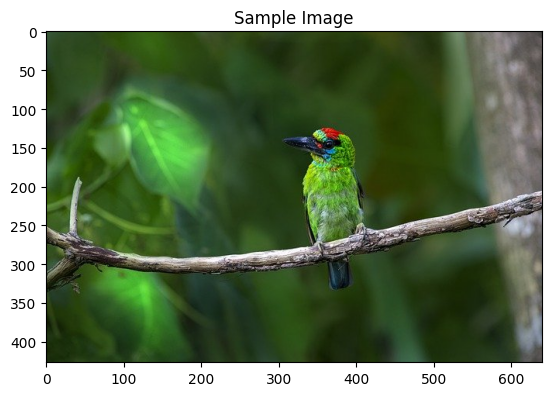

In [23]:
import matplotlib.pyplot as plt # matplotlib is a package for plotting data in Python

# this line is necessary to show the image in the notebook
%matplotlib inline

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)        # Convert from BGR to RGB color scheme

plt.imshow(img_rgb)
plt.title('Sample Image')
plt.show()

Matplotlib by default displayes the axes, which in this case correspond to pixel positions. If we don't want to show the axes, we can turn them off by calling the function `axis('off')`.

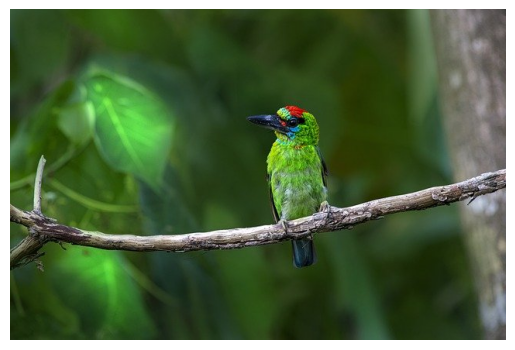

In [24]:
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

### What's in an image?

An image is made of a matrix of pixels. Each pixel has a different color, in a color image, or a different shade of gray, in a grayscale image.

A **grayscale** image is a 2D array (rows x columns) of intensity values. Typically, 8 bits per intensity value.Range from 0 to 255.

A **color** image is three 2D arrays of intensity values for red, green, and blue.

Let's explore the contents of the bird image above.

In [25]:
print(img.shape)

(427, 640, 3)


We notice that the shape of the matrix `img` in which the image was loaded is (427x640x3). That is because the image has a resolution of 427-by-640 pixels and each pixel is made of three values, its Blue, Green, and Red channels.

We can access parts of an image by using numpy array slicing operations. Slicing in python means taking elements from one given index to another given index.

In [26]:
img_patch = img_rgb[120:180, 320:380, :]        # Extract a patch from the image

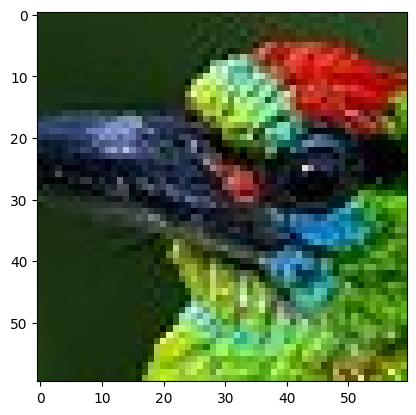

In [27]:
plt.imshow(img_patch)

In [28]:
print(img_patch.shape)

(60, 60, 3)


Let's zoom in further and look at the pixel values of the rows 20:30 and columns 40:50 of the blue channel. As we mentioned earlier, we will notice values ranging from 0 to 255.

In [29]:
print(img_patch[20:30, 40:50, 0])

[[109  15   0   0  42  96  63  35   0   1]
 [ 15  11  21 101 121  88  78  66  54  17]
 [  0  82  38  49   0   0   0   0  34  44]
 [  7   5   0   8  23  18  35  24   0  31]
 [  6  23  31  24  54  50  39  42  33  34]
 [ 34  14  22 225 140  38  59  45  10  35]
 [ 26   1  14  45   0   0   3  25   7  21]
 [ 14   0   3   2   0   4   0   5   5  38]
 [  0   4   0   0  17  13   6   1  18  14]
 [ 32   0   2   0   0   1   8   6  24  27]]


We can also save an image to our file system. For example if we wanted to save the cropped patch:

In [30]:
cv.imwrite('data/patch.png', img_patch)       # Save the patch to a file

True

## Image color spaces and channels

We can access the Blue, Green, and Red values of a particular pixel by a simple array operation, e.g.

In [31]:
print("Blue value at pixel [10, 20]: ", img[10, 20, 0])
print("Green value at pixel [10, 20]: ", img[10, 20, 1])
print("Red value at pixel [10, 20]: ", img[10, 20, 2])

# Or we can extract the blue, green, and red values of pixel [10, 20] all at once
(b, g, r) = img[10, 20, :]
print("Pixel values at pixel [10, 20]: B = {}, G = {}, R = {}".format(b, g, r))

Blue value at pixel [10, 20]:  36
Green value at pixel [10, 20]:  74
Red value at pixel [10, 20]:  46
Pixel values at pixel [10, 20]: B = 36, G = 74, R = 46


Each color channel is made of 8 bits, thus it can take 256 possilbe values, from 0 to 255. 0 denoting the complete absense of that color and 255 the maximum value for that color. Every pixel is made of a combination the color values for the B, G, R channels. 

We can split those three channels into its components (B, G, R)

In [32]:
b,g,r = cv.split(img)            # Split the image into its three channels

In [33]:
print(b.shape)

(427, 640)


We notice that when we print the matrix b of the blue channel, there is no third dimension anymore. We can display each channel separately.

In [34]:
# Print the type of the b channel of the image
print(type(b[0,0]))

<class 'numpy.uint8'>


Let's scale the values of the pixels to the range `[0,1]` and display the three channels separately. We will also normalize the each pixel value for each channel by dividing it by the sum of the three channels `(b+g+r)`. This will take away the total intensity of the pixel and leave us with the relative intensity of each channel.

In [35]:
# Normalize each channel of the image to the range [0, 1]
b_norm = b / 255.0
g_norm = g / 255.0
r_norm = r / 255.0

# Divide by the sum of the channels
epsilon = 1e-10      # A small number to avoid division by zero
b_norm = b_norm / (b_norm + g_norm + r_norm + epsilon)
g_norm = g_norm / (b_norm + g_norm + r_norm + epsilon)
r_norm = r_norm / (b_norm + g_norm + r_norm + epsilon)

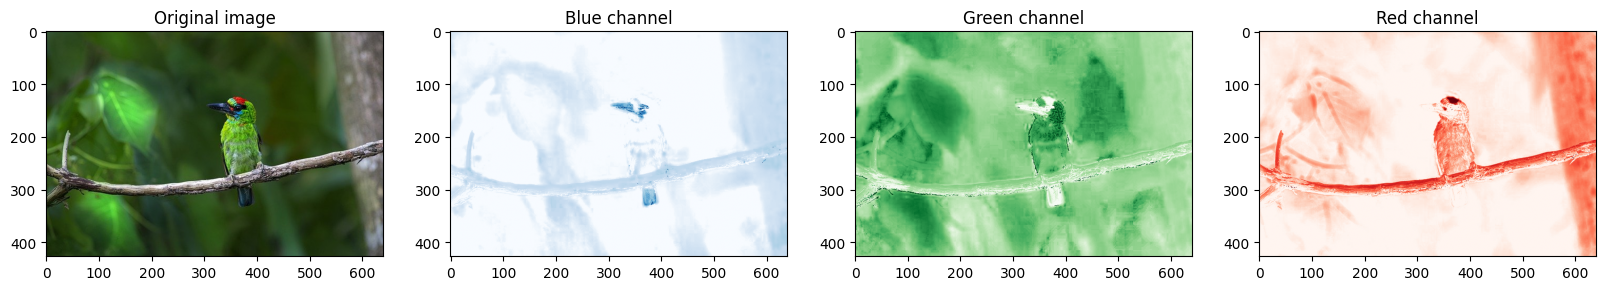

In [36]:
# Specify a size for all subplots
plt.figure(figsize=(20,5))                # Create a figure of size 20x5

# Create subplots of one row and three columns: subplot(nrows, ncols, index, **kwargs)
# For documentation, see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
plt.subplot(1, 4, 1),plt.imshow(img_rgb),plt.title('Original image')
plt.subplot(1, 4, 2),plt.imshow(b_norm, 'Blues', vmin=0.2, vmax=0.7),plt.title('Blue channel')
plt.subplot(1, 4, 3),plt.imshow(g_norm, 'Greens', vmin=0.2, vmax=0.7),plt.title('Green channel')
plt.subplot(1, 4, 4),plt.imshow(r_norm, 'Reds', vmin=0.2, vmax=0.7),plt.title('Red channel')
plt.show()

We can also merge channels.

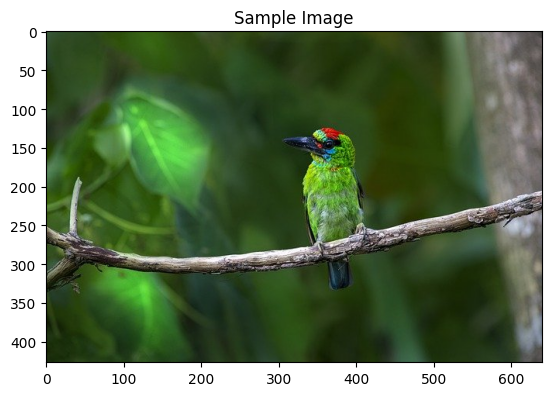

In [37]:
img = cv.merge((b,g,r))                         # Merge the three channels back together
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)    # Convert from BGR to RGB color scheme

plt.imshow(img_rgb)
plt.title('Sample Image')
plt.show()

## Arithmetic operations on images

### Addition
Let's create two matrices (2-dimensional numpy arrays) with a single pixel in each. Pixel values are 8-bit unsigned integers with value range from 0 to 255.

In [38]:
x = np.uint8([250])                            # Create a numpy array of a single integer
y = np.uint8([10])

print(x + y)

[4]


In [39]:
print(cv.add(x, y))

[[260.]
 [  0.]
 [  0.]
 [  0.]]


We notice that adding `x + y` produces a sum of 4. That's because a sum greater than 255 results in an overflow for a uint8. Adding those numbers using the cv `add` function on the other hand results in a sum of 255. That's because the cv function knows that the maximum possible value for an image pixel is 255, and automatically sets the sum to that value when it is greater than 255.

The same can be done with whole images. Let's load two grayscale face pictures and add them together.

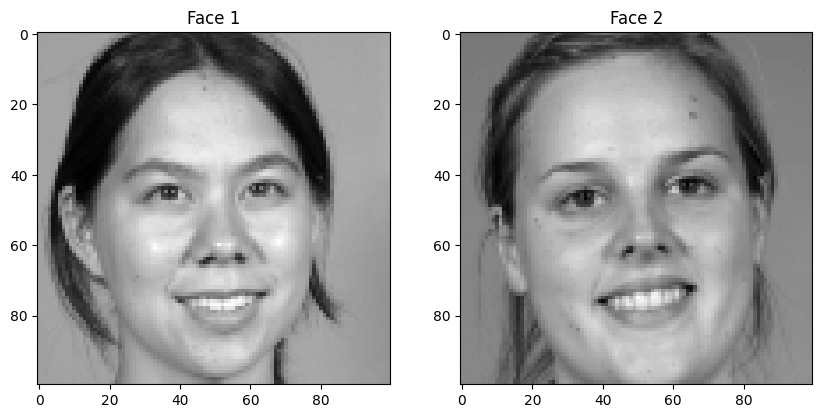

In [40]:
# Read a gray scale image
face1 = cv.imread('data/faces/04305d01.bmp', cv.IMREAD_GRAYSCALE)   # Read the image in grayscale
face2 = cv.imread('data/faces/04309d01.bmp', 0)                     # Alternatively, we can pass the flag 0 to read 
                                                                    # an image in grayscale

# Create a subplot of one row and two columns
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1),plt.imshow(face1, cmap='gray'),plt.title('Face 1') # Show the image in grayscale
plt.subplot(1, 2, 2),plt.imshow(face2, cmap='gray'),plt.title('Face 2')
plt.show()

Let's add the two faces together.

(<matplotlib.image.AxesImage at 0x7bc7a4a9a8d0>,
 Text(0.5, 1.0, 'Blended Face'))

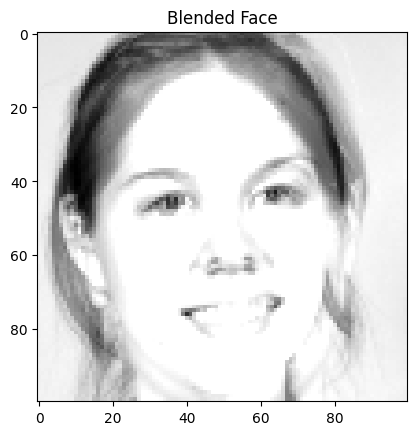

In [41]:
# Add the two images
blended_face = cv.add(face1, face2)

# Show the blended face
plt.imshow(blended_face, cmap='gray'),plt.title('Blended Face')

Notice how the final result is a mix of the two faces, and it looks brighter than the original faces because the sum of the pixel values get closer to 255 which is the grayscale value for white.

We can also control how strongly each face will control the result by doing a weighted addition using the function `cv.addWeighted()`. 

The weighted addition uses the following formula:
$$ dst = \alpha \cdot img1 + \beta \cdot img2 + \gamma $$
where $\alpha$ and $\beta$ are the weights of the first and second elements respectively, and $\gamma$ is an extra scalar we may want to add to the sum.

(<matplotlib.image.AxesImage at 0x7bc7a4af3e10>,
 Text(0.5, 1.0, 'Weighted Blend'))

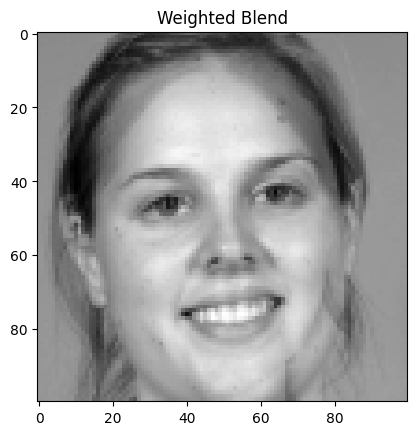

In [42]:
# Perform a weighted sum of the two images
weighted_blend = cv.addWeighted(face1, 0.3, face2, 0.8, 0)

# Show the weighted blend
plt.imshow(weighted_blend, cmap='gray'),plt.title('Weighted Blend')

### Bitwise boolean operations

Bitwise boolean operations, like AND (`&`), OR (`|`), XOR (`^`), and NOT (`~`) are used to perform boolean operations on images.

Such operations are easier to see on binary images. A binary image is a 2D array of 0s and 1s.

(<matplotlib.image.AxesImage at 0x7bc7a4a69790>, Text(0.5, 1.0, 'Circle'))

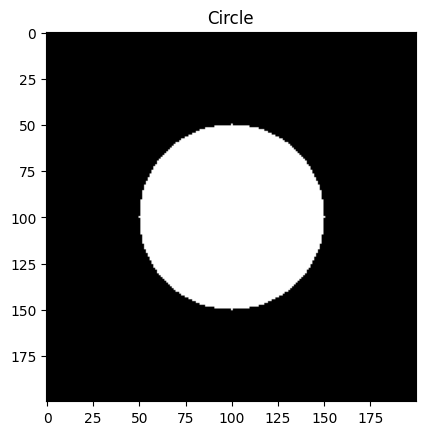

In [43]:
# Generate a two dimensional binary numpy array that contains a circle
# The circle is centered at (100, 100) and has radius 50
# The circle is filled with ones
circle = np.zeros((200, 200), np.uint8)
cv.circle(circle, (100, 100), 50, 255, -1)

# Display the circle
plt.imshow(circle, cmap='gray'),plt.title('Circle')

(<matplotlib.image.AxesImage at 0x7bc7cc48fe90>, Text(0.5, 1.0, 'Square'))

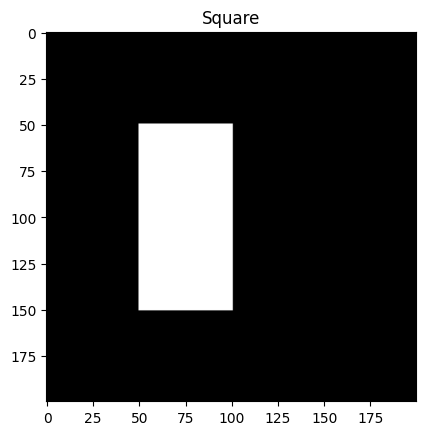

In [44]:
# Generate a two dimensional binary numpy array that contains a rectangle
# The top left corner of the rectangle is at (50, 50) and has width 50 and height of 100
# The square is filled with ones
rectangle = np.zeros((200, 200), np.uint8)
cv.rectangle(rectangle, (50, 50), (100, 150), 255, -1)

# Display the square
plt.imshow(rectangle, cmap='gray'),plt.title('Square')

Let's now apply some bitwise boolean operations to the circle and the rectangle.

(<matplotlib.image.AxesImage at 0x7bc7cc402010>, Text(0.5, 1.0, 'Bitwise AND'))

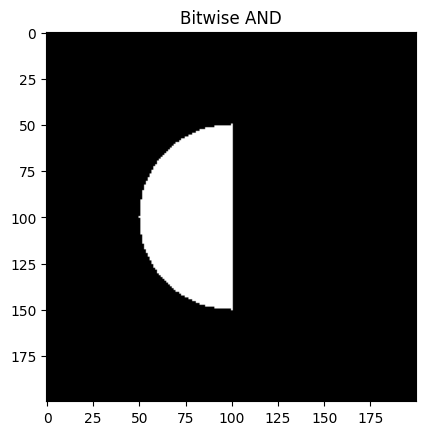

In [45]:
# Bitwise AND the circle and the square
bitwise_and = cv.bitwise_and(circle, rectangle)

# Display the bitwise AND
plt.imshow(bitwise_and, cmap='gray'),plt.title('Bitwise AND')

(<matplotlib.image.AxesImage at 0x7bc7cc5f2090>, Text(0.5, 1.0, 'Bitwise OR'))

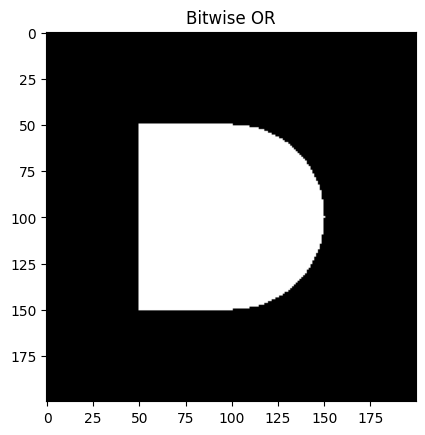

In [46]:
# Bitwise OR the circle and the square
bitwise_or = cv.bitwise_or(circle, rectangle)

# Display the bitwise OR
plt.imshow(bitwise_or, cmap='gray'),plt.title('Bitwise OR')

(<matplotlib.image.AxesImage at 0x7bc7cc571cd0>, Text(0.5, 1.0, 'Bitwise NOT'))

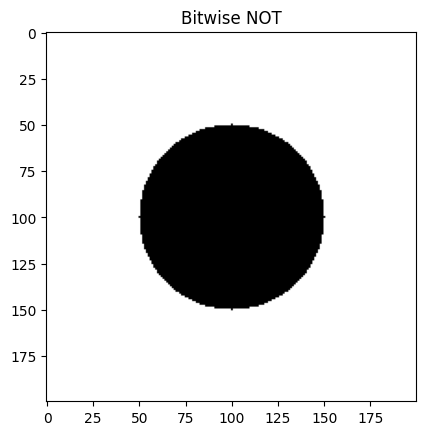

In [47]:
# Bitwise NOT the circle
bitwise_not = cv.bitwise_not(circle)

# Display the bitwise NOT
plt.imshow(bitwise_not, cmap='gray'),plt.title('Bitwise NOT')

## Geometric transformations of images

Another type of transformation that we can apply to images is geometric transformations. As the name implies, such transformations change the shape of the image. Examples of such transformations are translation, rotation, affine transformation etc. 

### Scaling
Let's apply some of those transformations to one of the faces that we previously loaded.

(<matplotlib.image.AxesImage at 0x7bc7a4da75d0>,
 Text(0.5, 1.0, 'Face 1 Small'))

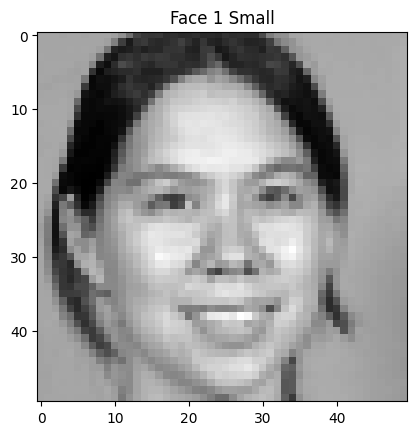

In [48]:
# Resize face1 to half the original size
# Please refer to the documentation for cv.resize() - https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d
face1_small = cv.resize(face1, None, fx=0.5, fy=0.5)
plt.imshow(face1_small, cmap='gray'),plt.title('Face 1 Small')

As you can see, the axes now have the range 0-50 as opposed to 0-100 that they did before, indicating that the image image is half the size. We can also verify that by printing out the dimensions of the original face1 and the resized one.

In [49]:
print(face1.shape)
print(face1_small.shape)

(100, 100)
(50, 50)


Other geometric operations, like translation, rotation, and affine transformations can be done with the help of the function `cv.warpAffine`.

### Translation

Translation is the shifting of an object's location. If you know the shift in the (x,y) direction and let it be $(t_x,t_y)$, you can create the transformation matrix M as follows:

$$ M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix} $$

Let's translate the face image by a few pixels.

(<matplotlib.image.AxesImage at 0x7bc7a4cf03d0>,
 Text(0.5, 1.0, 'Face 1 Translated'))

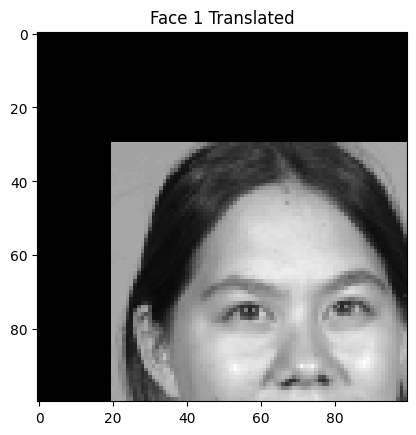

In [50]:
# Translate face1 by 20 pixels to the right and 30 pixels down
M = np.float32([[1, 0, 20], [0, 1, 30]])                    # Define the translation matrix
rows, cols = face1.shape                                    # Get the number of rows and columns in the image
face1_translated = cv.warpAffine(face1, M, (cols, rows))    # Perform the translation
plt.imshow(face1_translated, cmap='gray'),plt.title('Face 1 Translated')

### Rotation

Rotation of an image for an angle $θ$ is achieved by the transformation matrix of the form.

$$M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}$$

But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. The modified transformation matrix is given by

$$\begin{bmatrix} \alpha & \beta & (1 - \alpha ) \cdot center.x - \beta \cdot center.y \\ - \beta & \alpha & \beta \cdot center.x + (1- \alpha ) \cdot center.y \end{bmatrix}$$

where:

$$\begin{array}{l} \alpha = scale \cdot \cos \theta , \\ \beta = scale \cdot \sin \theta \end{array}$$

To find this transformation matrix, OpenCV provides a function, `cv.getRotationMatrix2D`. Check out the below example which rotates the image by 90 degree with respect to center without any scaling.

(<matplotlib.image.AxesImage at 0x7bc7a4e94990>,
 Text(0.5, 1.0, 'Face 1 Rotated'))

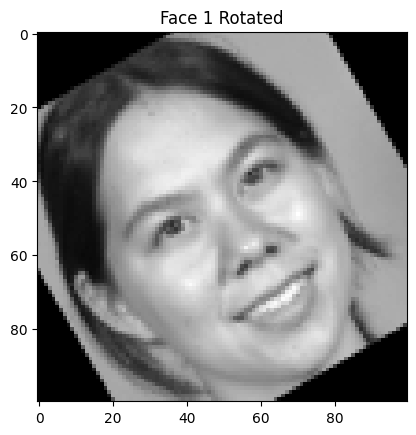

In [51]:
# Rotate face1 by 30 degrees
M = cv.getRotationMatrix2D((cols/2, rows/2), 30, 1)             # (center, angle, scale)
face1_rotated = cv.warpAffine(face1, M, (cols, rows))           # Perform the rotation
plt.imshow(face1_rotated, cmap='gray'),plt.title('Face 1 Rotated')

### Affine Transformation
In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from the input image and their corresponding locations in the output image. Then `cv.getAffineTransform` will create a 2x3 matrix which is to be passed to `cv.warpAffine`.

Check the below example, and also look at the points I selected (which are marked in green color): 

In [52]:
# Auxiliary function to draw a few points on a given image
def draw_points(img, points):
    for x, y in points:
        cv.circle(img, (int(x), int(y)), 2, (255, 255, 255), -1)

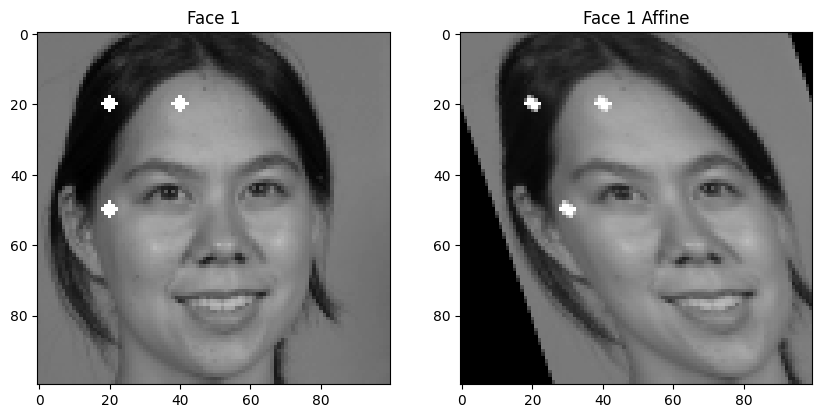

In [53]:
# Read a gray scale image
face1 = cv.imread('data/faces/04305d01.bmp', 0)

# Perform an affine transform on face1
pts1 = np.float32([[20, 20], [40, 20], [20, 50]])       # (x, y) positions of three points in the image
pts2 = np.float32([[20, 20], [40, 20], [30, 50]])       # the new positions of the three points
draw_points(face1, pts1) # Draw the points on face1

M = cv.getAffineTransform(pts1, pts2)                   # Compute the affine transform
face1_affine = cv.warpAffine(face1, M, (cols, rows))    # Perform the affine transform

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1),plt.imshow(face1, cmap='gray'),plt.title('Face 1')
plt.subplot(1, 2, 2),plt.imshow(face1_affine, cmap='gray'),plt.title('Face 1 Affine')
plt.show()

We notice that the point at the original position (x, y) = (20, 50) was moved the the new position (30, 50), and with it the entire image was transformed accordingly.